In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv('../data/final_dataset.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True) 

data = df[['Close']].values
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)




In [70]:
def create_sequences(data, window_size):
    x, y = [], []
    for i in range(len(data) - window_size):
        x.append(data[i:i + window_size])
        y.append(data[i + window_size])
    return np.array(x), np.array(y)

window_size = 60 
x, y = create_sequences(scaled_data, window_size)

# split the data into training and testing sets
split = int(len(x)* 0.8) # 80% of 240 samples for training
x_train, x_test = x[:split], x[split:] # 0-191 for training, 192-239 for testing
y_train, y_test = y[:split], y[split:]

x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))



Epoch 1/40


c:\Users\priya\Downloads\stock-market-prediction\venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 150ms/step - loss: 0.4311 - val_loss: 0.0208
Epoch 2/40
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.0465 - val_loss: 0.1018
Epoch 3/40
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0419 - val_loss: 0.0128
Epoch 4/40
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.0310 - val_loss: 0.0131
Epoch 5/40
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.0243 - val_loss: 0.0194
Epoch 6/40
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0207 - val_loss: 0.0328
Epoch 7/40
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0209 - val_loss: 0.0170
Epoch 8/40
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.0221 - val_loss: 0.0134
Epoch 9/40
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.0172 - val_loss: 0.0182
Epoch 10/40
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0180 - val_loss: 0.0258
Epoch 11/40
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0219 - val_loss: 0.0168
Epoch 12/40
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.0157 - val_loss: 0.0151
Epoch 13/40

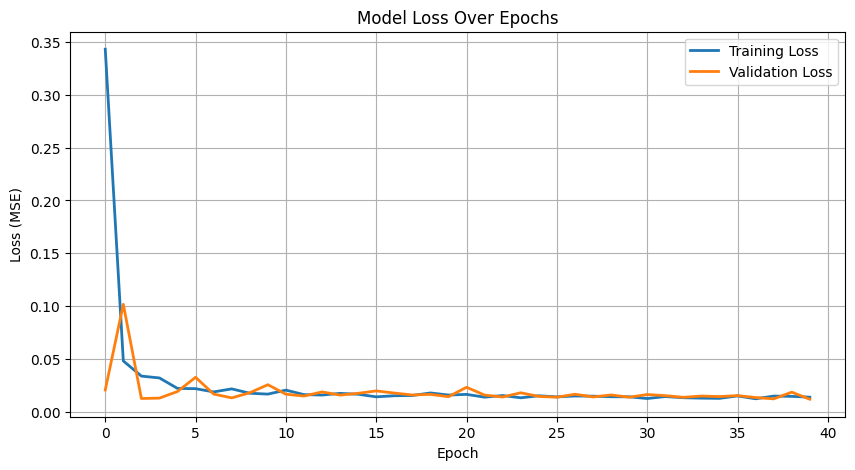

In [71]:
import tensorflow as tf 

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.LSTM(units=50, return_sequences=False))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

history = model.fit(x_train, y_train, epochs=40, batch_size= 32, validation_data=(x_test, y_test), verbose=1)

plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss', linewidth=2)
plt.plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)
plt.show()


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 366ms/step


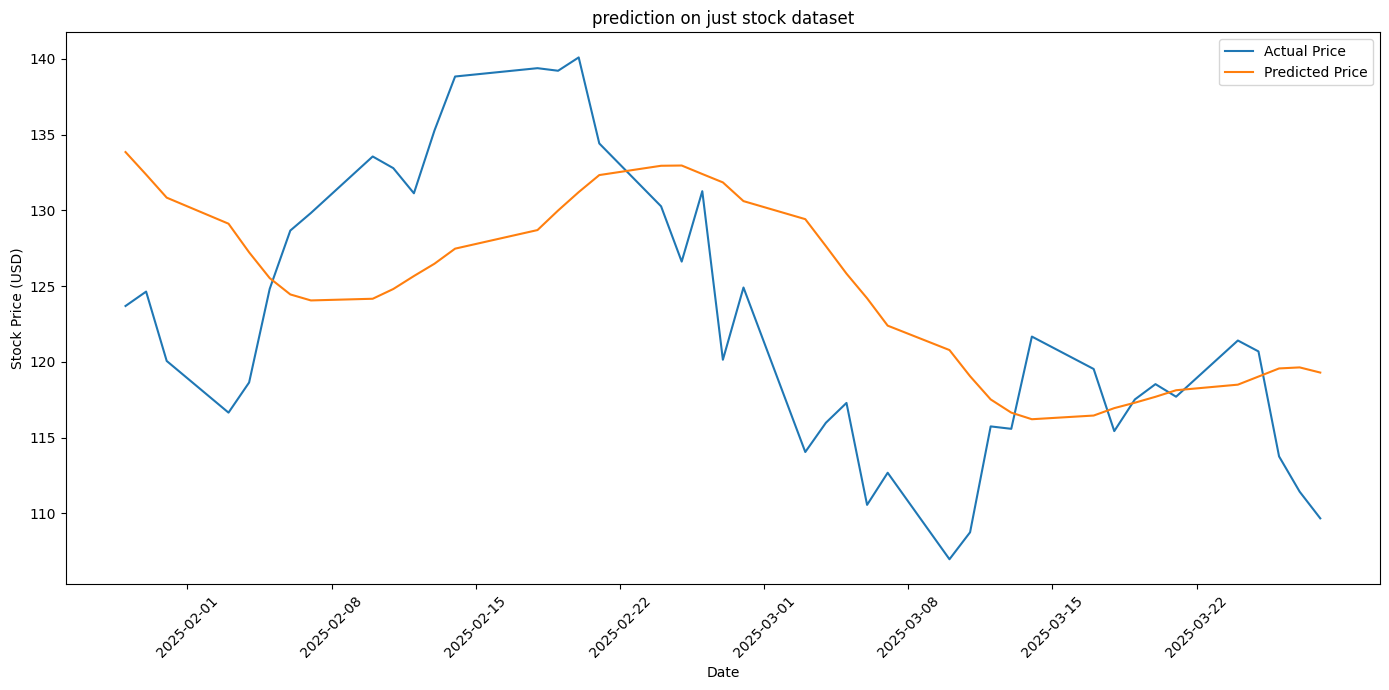

In [72]:
predicted = model.predict(x_test) #predicting based on the test set
predicted = scaler.inverse_transform(predicted) # convert back from normalized to original scale
actual = scaler.inverse_transform(y_test) # convert actual y vals back to original scale

test_dates = df.index[-len(y_test):]

# Plotting the results
plt.figure(figsize=(14, 7))
plt.plot(test_dates, actual, label='Actual Price')
plt.plot(test_dates, predicted, label='Predicted Price')
plt.title('prediction on just stock dataset')
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [73]:
model.save('../models/lstm_stock.h5')

In [76]:
import joblib
joblib.dump(scaler, 'scaler_stock.save')

['scaler_stock.save']